In [2]:
# Stdlib
import pickle
from IPython.display import display, Latex

# Scientific computing
import numpy as np

# Data handling and vis
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Miscellaneous
from tabulate import tabulate

# Preprocessing

## Loading and concatenating dataframes

In [3]:
# Without intercept
metadata = {
    "PROJECT_ID": "EMB_ex28",
    "RESEARCHERS": "DK",
    "CURRENT_VERSION": "v1.0",
    "DATE": "20230301"
}
TAG = "{PROJECT_ID}{CURRENT_VERSION}_{RESEARCHERS}_{DATE}".format(**metadata)

df_nfi = pd.read_csv(f"../../results/dataframes/dataframe_{TAG}.csv")

# # With intercept
# metadata = {
#     "PROJECT_ID": "EMB_ex27",
#     "RESEARCHERS": "DK",
#     "CURRENT_VERSION": "v3.1-FI",
#     "DATE": "20230301"
# }
# TAG = "{PROJECT_ID}{CURRENT_VERSION}_{RESEARCHERS}_{DATE}".format(**metadata)

# df_fi = pd.read_csv(f"../../results/dataframes/dataframe_{TAG}.csv")

df_nfi["fit_intercept"] = [False] * len(df_nfi)
# df_fi["fit_intercept"] = [True] * len(df_fi)


df = df_nfi
# df = pd.concat([df_nfi, df_fi])
# df = df.reset_index()

In [4]:
# MEC reference - D
# Mistake with label, don't worry about DC in load statement
with open("../../results/MEC/D-arxiv.pkl", "rb") as _fh:
    arxiv_D = pickle.load(_fh)[('DC', 2, 6)]
with open("../../results/MEC/D-drosophila.pkl", "rb") as _fh:
    drosophila_D = pickle.load(_fh)[('DC', 1, 2)]
with open("../../results/MEC/D-celegans.pkl", "rb") as _fh:
    celegans_D = pickle.load(_fh)[('DC', 1, 2)]
with open("../../results/MEC/D-london.pkl", "rb") as _fh:
    london_D = pickle.load(_fh)[('DC', 1, 2)]

In [5]:
# MEC reference - DC
with open("../../results/MEC/figure4a_data.pk", "rb") as _fh:
    arxiv_DC = pickle.load(_fh)[('DC', 2, 6)]
with open("../../results/MEC/figure4b_data.pk", "rb") as _fh:
    drosophila_DC = pickle.load(_fh)[('DC', 1, 2)]
with open("../../results/MEC/figure4c_data.pk", "rb") as _fh:
    celegans_DC = pickle.load(_fh)[('DC', 1, 2)]
with open("../../results/MEC/figure4d_data.pk", "rb") as _fh:
    london_DC = pickle.load(_fh)[('DC', 1, 2)]

## Pruning

In [6]:
# Drop dummy index
df = df.drop(columns=["Unnamed: 0", "accuracy", "aupr"])

# Drop rows with infs
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(how="any", inplace=True)

## Reindexing and renaming

In [7]:
# Rename layers
df = df.rename(columns={"l1": "alpha", "l2": "beta"})

In [8]:
df.describe()

,alpha,beta,theta,auroc,process_time,wall_time
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.250000,3.000000,0.500000,0.773230,107.762067,107.762068
std,0.434221,1.736882,0.258919,0.205556,102.364283,102.364284
min,1.000000,2.000000,0.100000,0.160898,5.310059,5.310060
25%,1.000000,2.000000,0.300000,0.628264,7.910971,7.910972
50%,1.000000,2.000000,0.500000,0.832789,75.745995,75.745996
75%,1.250000,3.000000,0.700000,0.966119,211.118693,211.118694
max,2.000000,6.000000,0.900000,1.000000,262.519492,262.519493


# Analysis

Text(0.5, 1.0, 'Reproduce Naive Bayes D results')

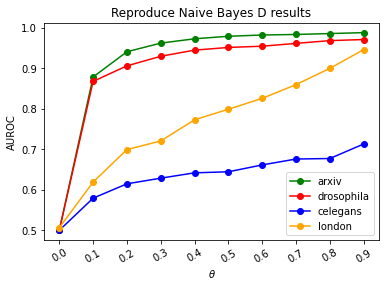

In [9]:
plt.figure()

plt.plot(arxiv_D[2], label="arxiv", color="green", marker="o")
plt.plot(drosophila_D[2], label="drosophila", color="red", marker="o")
plt.plot(celegans_D[2], label="celegans", color="blue", marker="o")
plt.plot(london_D[2], label="london", color="orange", marker="o")

plt.legend()

plt.xticks(
    range(10),
    [
        float(np.format_float_scientific(x, precision=1))
        for x in np.linspace(0, 0.9, 10)
    ],
    rotation=30
)

plt.xlabel("$\\theta$")
plt.ylabel("AUROC")

plt.title("Reproduce Naive Bayes D results")

Text(0.5, 1.0, 'Reproduce Naive Bayes DC results')

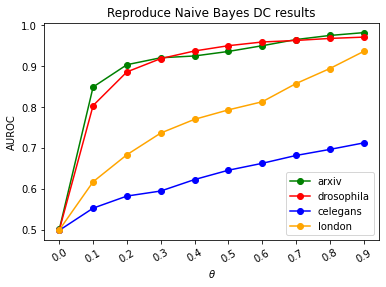

In [10]:
plt.figure()

plt.plot(arxiv_DC[2], label="arxiv", color="green", marker="o")
plt.plot(drosophila_DC[2], label="drosophila", color="red", marker="o")
plt.plot(celegans_DC[2], label="celegans", color="blue", marker="o")
plt.plot(london_DC[2], label="london", color="orange", marker="o")

plt.legend()

plt.xticks(
    range(10),
    [
        float(np.format_float_scientific(x, precision=1))
        for x in np.linspace(0, 0.9, 10)
    ],
    rotation=30
)

plt.xlabel("$\\theta$")
plt.ylabel("AUROC")

plt.title("Reproduce Naive Bayes DC results")

## Configuration distances

<Figure size 432x288 with 0 Axes>

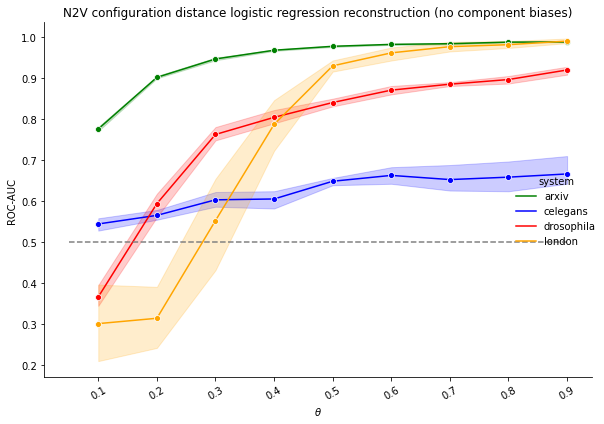

In [11]:
# Instantiate figure, subset relevant data
plt.figure()

# Plotting data
sns.relplot(
    data=df.query("fit_intercept == False"), kind="line",
    x="theta", y="auroc",
    hue="system", palette=["green", "blue", "red", "orange"],
    marker="o",
    height=6, aspect=1.2,
)

# Axes configuration
plt.hlines(0.5, 0.05, 0.9, linestyles="dashed", colors="gray")
plt.xticks(
    [float(np.format_float_scientific(x, precision=1)) for x in set(df["theta"])],
    rotation=30
)
plt.xlabel("$\\theta$")


plt.yticks(np.linspace(0.2, 1, endpoint=True, num=8+1))
plt.ylabel("ROC-AUC")


# Figure-level attributes
plt.title("N2V configuration distance logistic regression reconstruction (no component biases)")

# Save plot
plt.tight_layout()
# plt.savefig("../../results/plots/line_auroc-pfi_N2V-logreg-configuration-distance.png", facecolor="white", transparent=False)

<Figure size 432x288 with 0 Axes>

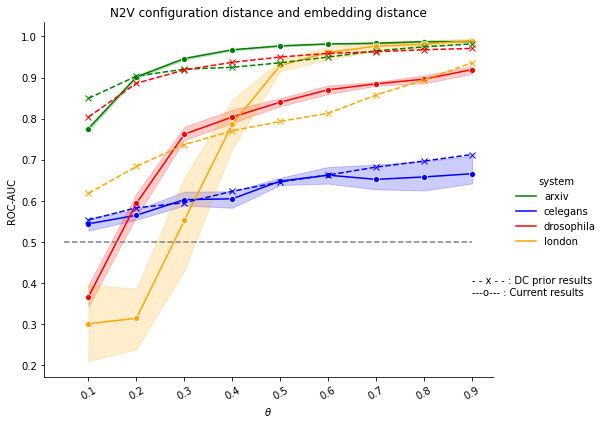

In [12]:
# Instantiate figure, subset relevant data
plt.figure()

# Plotting data
## ex27
sns.relplot(
    data=df.query("fit_intercept == False"), kind="line",
    x="theta", y="auroc",
    hue="system", palette=["green", "blue", "red", "orange"],
    marker="o",
    height=6, aspect=1.2,
    legend=True
)
## MEC
ticks_ = [float(np.format_float_scientific(x, precision=1)) for x in np.linspace(0.1, 0.9, 9)]
# plt.plot(ticks_, arxiv_D[2][1:], label="arxiv", color="green", marker="*", linestyle="--")
# plt.plot(ticks_, drosophila_D[2][1:], label="drosophila", color="red", marker="*", linestyle="--")
# plt.plot(ticks_, celegans_D[2][1:], label="celegans", color="blue", marker="*", linestyle="--")
# plt.plot(ticks_, london_D[2][1:], label="london", color="orange", marker="*", linestyle="--")
plt.plot(ticks_, arxiv_DC[2][1:], label="arxiv", color="green", marker="x", linestyle="--")
plt.plot(ticks_, drosophila_DC[2][1:], label="drosophila", color="red", marker="x", linestyle="--")
plt.plot(ticks_, celegans_DC[2][1:], label="celegans", color="blue", marker="x", linestyle="--")
plt.plot(ticks_, london_DC[2][1:], label="london", color="orange", marker="x", linestyle="--")

# Axes configuration
plt.hlines(0.5, 0.05, 0.9, linestyles="dashed", colors="gray")
plt.xticks(
    [float(np.format_float_scientific(x, precision=1)) for x in set(df["theta"]) if x > 0],
    rotation=30
)
plt.xlabel("$\\theta$")


plt.yticks(np.linspace(0.2, 1, endpoint=True, num=8+1))
plt.ylabel("ROC-AUC")


# Figure-level attributes
# plt.text(0.9, 0.43, "- - * - - : D prior results")
plt.text(0.9, 0.4, "- - x - - : DC prior results")
plt.text(0.9, 0.37, "---o--- : Current results")
plt.title("N2V configuration distance and embedding distance")

# Save plot
plt.tight_layout()
plt.savefig("../../results/plots/line_auroc-pfi_N2V-logreg-configuration-distance-embdist_MEC-baseline.png", facecolor="white", transparent=False)

## Configuration distances with intercept

<Figure size 432x288 with 0 Axes>

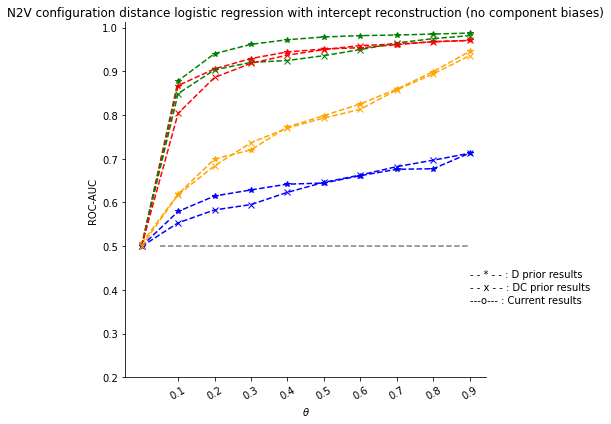

In [13]:
# Instantiate figure, subset relevant data
plt.figure()

# Plotting data
## ex27
sns.relplot(
    data=df.query("fit_intercept == True"), kind="line",
    x="theta", y="auroc",
    hue="system", palette=["green", "blue", "red", "orange"],
    marker="o",
    height=6, aspect=1.2,
    legend=True
)
## MEC
ticks_ = [float(np.format_float_scientific(x, precision=1)) for x in np.linspace(0, 0.9, 10)]
plt.plot(ticks_, arxiv_D[2], label="arxiv", color="green", marker="*", linestyle="--")
plt.plot(ticks_, drosophila_D[2], label="drosophila", color="red", marker="*", linestyle="--")
plt.plot(ticks_, celegans_D[2], label="celegans", color="blue", marker="*", linestyle="--")
plt.plot(ticks_, london_D[2], label="london", color="orange", marker="*", linestyle="--")
plt.plot(ticks_, arxiv_DC[2], label="arxiv", color="green", marker="x", linestyle="--")
plt.plot(ticks_, drosophila_DC[2], label="drosophila", color="red", marker="x", linestyle="--")
plt.plot(ticks_, celegans_DC[2], label="celegans", color="blue", marker="x", linestyle="--")
plt.plot(ticks_, london_DC[2], label="london", color="orange", marker="x", linestyle="--")

# Axes configuration
plt.hlines(0.5, 0.05, 0.9, linestyles="dashed", colors="gray")
plt.xticks(
    [float(np.format_float_scientific(x, precision=1)) for x in set(df["theta"])],
    rotation=30
)
plt.xlabel("$\\theta$")


plt.yticks(np.linspace(0.2, 1, endpoint=True, num=8+1))
plt.ylabel("ROC-AUC")


# Figure-level attributes
plt.text(0.9, 0.43, "- - * - - : D prior results")
plt.text(0.9, 0.4, "- - x - - : DC prior results")
plt.text(0.9, 0.37, "---o--- : Current results")
plt.title("N2V configuration distance logistic regression with intercept reconstruction (no component biases)")

# Save plot
plt.tight_layout()
# plt.savefig("../../results/plots/line_auroc-pfi_N2V-logreg-FI-configuration-distance_MEC-baseline.png", facecolor="white", transparent=False)

In [14]:
# Instantiate figure, subset relevant data
plt.figure()

# Plotting data
sns.relplot(
    data=df, kind="line",
    x="theta", y="auroc",
    hue="system", palette=["green", "blue", "red", "orange"],
    style="fit_intercept",
    markers=["^", "s"],
    alpha=0.5,
    height=6, aspect=1.2,
    legend=True
)

# Axes configuration
plt.hlines(0.5, 0.05, 0.9, linestyles="dashed", colors="gray")
plt.xticks(
    [float(np.format_float_scientific(x, precision=1)) for x in set(df["theta"])],
    rotation=30
)
plt.xlabel("$\\theta$")


plt.yticks(np.linspace(0.5, 1, endpoint=True, num=10+1))
plt.ylabel("ROC-AUC")

# Figure-level attributes
plt.title("Effect of intercept fitting on configuration degrees")

# Save plot
plt.tight_layout()
# plt.savefig("../../results/plots/line_auroc-pfi_N2V-logreg_FI-effect.png", facecolor="white", transparent=False)

ValueError: The `markers` argument has the wrong number of values

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

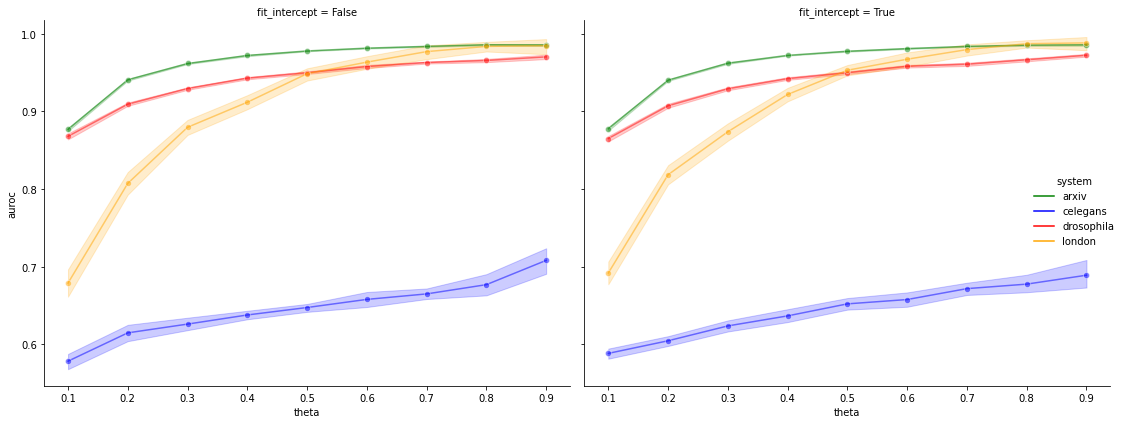

In [ ]:
# Instantiate figure, subset relevant data
plt.figure()

# Plotting data
sns.relplot(
    data=df, kind="line",
    x="theta", y="auroc",
    hue="system", palette=["green", "blue", "red", "orange"],
    col="fit_intercept",
    marker="o",
    alpha=0.5,
    height=6, aspect=1.2,
    legend=True
)

# Save plot
plt.tight_layout()
# plt.savefig("../../results/plots/.png", facecolor="white", transparent=False)